I tried to make the project with cascada clasifier but installing cv2 version 2 was really dificult and kind of messed up some dependencies in my computer. After that I tried to do it with mrcnn (python library) which use tensorflow version 1. And it was not compatible with my computer. So finally, I decided to do it from scratch with tensorflow. With the help of this [article](https://towardsdatascience.com/step-by-step-r-cnn-implementation-from-scratch-in-python-e97101ccde55).

The objectives of this proyects are:
- Create your own dataset from pre-existing datasets.
- Describe your final dataset.
- Define your modelisation strategy.
- Use OpenCV to accomplish this task and then a specialized framework for object detection of your choice.
- Use cnn clasifier
- User pre trained model

# 1 Introduction

The project consist in giving an image, detect your favorite animal and put a rectangle around them.
My strategy consists in use rcnn, algorith that consists in divide an image in little squares, start searching from a little square to the main image and when finding our pet, save the coordinates to draw the square later.

# 2 Dataset exploration

The dataset[https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset] used have 80 folders, each one with one animal. Inside, there are photos and a Label folder that have the coodanates of each animal. One photo can have more than one animal in it.
\\
Inside each Folder is a Label Folder. Each image has their Label file that is in txt. Each one contains the type of animal and the coordinates of each one in the image. Only contains the coordinates for the same animal of the folder.

You have to put all the data set inside a file called 'Data'

# 3 Data exploration

The images are not of the same size and can be more than one diferent animal in a photo. And each type of animal has a different number of photos

Check the number of images that we have for every animal

In [2]:
import os

In [28]:
# all the animals to select and the number of images of each one
ii = 0
print("ID \t ANIMAL \t\t NUMBER OF IMAGES")
for i in all_animals_in_data:
    print(ii, '\t', i, '\t\t\t', len(os.listdir(os.path.join(path_of_all_data, i))))
    ii = ii + 1

ID 	 ANIMAL 		 NUMBER OF IMAGES
0 	 Mule 			 37
1 	 Giraffe 			 24
2 	 Sea turtle 			 88
3 	 Panda 			 20
4 	 Moths and butterflies 			 30
5 	 Red panda 			 43
6 	 Sparrow 			 132
7 	 Bull 			 74
8 	 Raccoon 			 52
9 	 Pig 			 97
10 	 Bear 			 40
11 	 Hamster 			 70
12 	 Jellyfish 			 93
13 	 Rhinoceros 			 35
14 	 Crocodile 			 77
15 	 Goldfish 			 32
16 	 Frog 			 78
17 	 Penguin 			 62
18 	 Kangaroo 			 44
19 	 Tick 			 2
20 	 Polar bear 			 56
21 	 Snail 			 115
22 	 Tiger 			 27
23 	 Canary 			 17
24 	 Harbor seal 			 62
25 	 Goose 			 34
26 	 Seahorse 			 34
27 	 Eagle 			 179
28 	 Lizard 			 261
29 	 Whale 			 53
30 	 Woodpecker 			 33
31 	 Leopard 			 58
32 	 Lynx 			 35
33 	 Turkey 			 44
34 	 Deer 			 178
35 	 Shark 			 59
36 	 Cheetah 			 36
37 	 Sheep 			 75
38 	 Zebra 			 32
39 	 Owl 			 71
40 	 Caterpillar 			 71
41 	 Starfish 			 56
42 	 Chicken 			 138
43 	 Swan 			 65
44 	 Sea lion 			 49
45 	 Snake 			 214
46 	 Tortoise 			 108
47 	 Fox 			 70
48 	 Butterfly 			 171
4

# 4 Preprocessing

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil

### Select positive and negative animals

Positive animals are the ones that we want to select, in this case, the favorite animal. Negative animals are the ones that are not our favorite animal.

In [4]:
#pahts
path_of_all_data = os.getcwd() + '/Data'
all_animals_in_data = os.listdir(path_of_all_data)
file_for_train = os.getcwd() + '/data_to_train'


In [48]:
# Select negative and positive (favorite one) animals
# Monkey is choosen
# All the data is not used because it would be a big differences
# between the number of positives and negatives images
positive_animals_name = [all_animals_in_data[77]]
negative_animals_name = [ all_animals_in_data[i+36] for i in range(5)]
negative_animals_name.append(all_animals_in_data[73])

In [49]:
#check animals' names
print(positive_animals_name)
print(negative_animals_name)

['Monkey']
['Cheetah', 'Sheep', 'Zebra', 'Owl', 'Caterpillar', 'Elephant']


In [50]:
# create positive and negative files with the images
os.mkdir(file_for_train)
os.mkdir(file_for_train + '/positive')
os.mkdir(file_for_train + '/negative')

Copy our images for training

In [51]:
# copiar las imagenes
#images positives
for i in positive_animals_name:
    path_of_animal = os.path.join(path_of_all_data, i)
    print(path_of_animal)
    shutil.copytree(path_of_animal, file_for_train + '/positive', dirs_exist_ok=True)

/home/indhira/Escritorio/ind/P02/Data/Monkey


In [52]:
#negative images
for i in negative_animals_name:
    path_of_animal = os.path.join(path_of_all_data, i)
    print(path_of_animal)
    shutil.copytree(path_of_animal, file_for_train + '/negative',dirs_exist_ok=True)

/home/indhira/Escritorio/ind/P02/Data/Cheetah
/home/indhira/Escritorio/ind/P02/Data/Sheep
/home/indhira/Escritorio/ind/P02/Data/Zebra
/home/indhira/Escritorio/ind/P02/Data/Owl
/home/indhira/Escritorio/ind/P02/Data/Caterpillar
/home/indhira/Escritorio/ind/P02/Data/Elephant


#### Change Label folders place

In [126]:
shutil.copytree(file_for_train + '/positive/Label', file_for_train + '/positiveLabels', dirs_exist_ok=True)

'/home/indhira/Escritorio/ind/P02/data_to_train/positiveLabels'

In [127]:
shutil.copytree(file_for_train + '/negative/Label', file_for_train + '/negativeLabels', dirs_exist_ok=True)

'/home/indhira/Escritorio/ind/P02/data_to_train/negativeLabels'

In [128]:
shutil.rmtree(file_for_train + '/positive/Label')
shutil.rmtree(file_for_train + '/negative/Label')

##### Cut the regions where there is an animal for training the model with that

In [5]:
import cv2

train_images = []
train_labels = []
iii_c = 0

#iterate in negative and positive label files and them im train images
# and train_labels.
# Also, we cut the image with the coordinates to train the model

for pos_neg_it in ['/negative', '/positive']:
    label_path = file_for_train + pos_neg_it + 'Labels'
    pos_neg_path = file_for_train + pos_neg_it
    imgs = []
    for t in os.listdir(label_path):
        img = cv2.imread(pos_neg_path + '/' + t[0:-4]+'.jpg')
        f = open(label_path + '/' + t, 'r')
        vc = []
        for line in f:
            info = line.split()
            aa = int(info[1].split('.')[0])
            b = int(info[2].split('.')[0])
            c = int(info[3].split('.')[0])
            d = int(info[4].split('.')[0])
            vc.append([aa,b,c,d])

        # ss give us proposed regions for the image
#        ss.setBaseImage(img)
#        ss.switchToSelectiveSearchFast()
#        ssresults = ss.process()
        # cut the image where is an animal and label it
        for gtval in vc:
            imout = img.copy()
            timage = imout[b:d,aa:c]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            train_images.append(resized)
            train_labels.append(iii_c)
    
    iii_c = 1

##### Check results

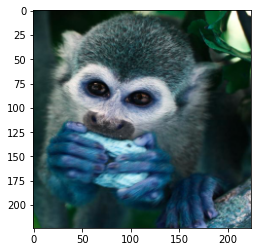

In [6]:
plt.imshow(train_images[-42])

In [7]:
x_np = np.array(train_images)
y_np = np.array(train_labels)

# 5 Modelization


In [8]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [9]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

#### IOU : Intersection over union 
[Article](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)

In [10]:
# x1 y1 x2 y2
# 0  1  2  3

# how much the boxes are alike
def get_iou(box1, box2):
    assert box1[0] < box1[2]
    assert box1[1] < box1[3]
    assert box2[0] < box2[2]
    assert box2[1] < box2[3]
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

#### Model

In [11]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [12]:
vggmodel = VGG16(weights='imagenet', include_top=True)

2023-01-10 00:42:57.041396: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 00:42:57.042518: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model = Model(inputs = vggmodel.input, outputs = predictions)
opt = Adam(learning_rate = 0.0001)
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

# one hot encoding
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_np)
x_train, x_test , y_train, y_test = train_test_split(x_np,Y,test_size=0.20, shuffle=True)


### Training

#### put the data to the model

In [15]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=x_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=x_test, y=y_test)


In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
h = model.fit(traindata, steps_per_epoch= 5, epochs= 10, validation_data= testdata, callbacks = [checkpoint,early])


Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9688 
Epoch 1: saving model to ieeercnn_vgg16_1.h5
5/5 [==============================] - 119s 27s/step - loss: 0.1147 - accuracy: 0.9688 - val_loss: 0.6445 - val_accuracy: 0.8966
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.9438 
Epoch 2: saving model to ieeercnn_vgg16_1.h5
5/5 [==============================] - 122s 28s/step - loss: 0.1082 - accuracy: 0.9438 - val_loss: 0.3703 - val_accuracy: 0.9517
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9937 
Epoch 3: saving model to ieeercnn_vgg16_1.h5
5/5 [==============================] - 134s 31s/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.6339 - val_accuracy: 0.9103
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9438 
Epoch 4: saving model to ieeercnn_vgg16_1.h5
5/5 [==============================] - 123s 28s/step - loss: 

Save the model

In [19]:
# save trained model
import joblib as jb
jb.dump(model, 'modelo.jobLib')

2023-01-10 01:07:33.129607: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://b076ea67-d219-4804-990d-5a3e5b7785a0/assets


['modelo.jobLib']

In [ ]:
# load model
import joblib as jb
model = jb.load('modelo.jobLib')

Function for an image

In [38]:
def predict_f(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (500,500), interpolation = cv2.INTER_AREA)

    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()

    imout = img.copy()
    c = 0
    for e,result in enumerate(ssresults):
        #print(e, result)
        if e < 100:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            plt.imshow(timage)
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model.predict(img)
            if out[0][0] > 0.8:
                c = c + 1
                print(out[0][0])
                cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        else:
            break
    plt.imshow(imout)
    print(c)

Examples

0.87353396
1.0
0.9952468
0.984134
0.9640039
0.9999497
0.83765775
7


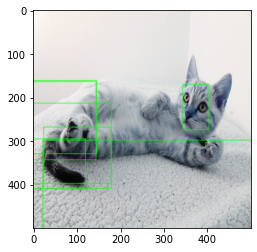

In [39]:
predict_f('c04.jpg')

1.0
0.97430533
0.99858534
3


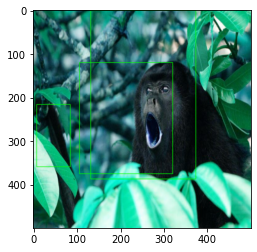

In [41]:
predict_f('im3.jpg')

0.9644041
0.9999765
2


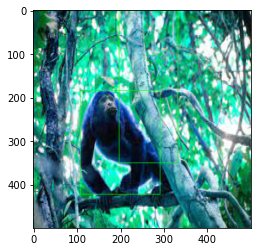

In [42]:
predict_f('im1.jpeg')

# 6 Performances evaluation

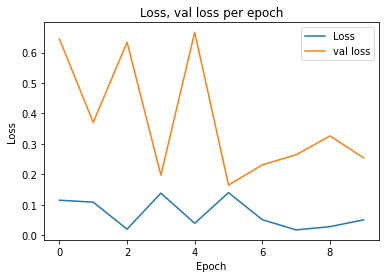

In [46]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title("Loss, val loss per epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","val loss"])
plt.show()


the loss decreases and the cost function (val loss) also decreases but a slower rate

# 7 Conclusion

- The rcnn model seams to work great but lacks of a good training. It has not been trained too well. This because I have problems with my graphic driver. That made the process slower that it would be if had use my graphic driver to use cuda optimization. That make me put few epoch and no look for a better threashold for draw the rectangle when predicting.

- The trained model could be improved by giving the model images without any animals. And using more data

- There is a lot of libraries that can be used to this implementation. But some (as cascade classifier and mrcnn) have dificult requirements to satisfy. As versions of other libraries that obsolete nowadays. Cascada classifier needs cv2 version 2 and mrcnn neeeds tensorflow version 1. 

# 8 Bonus

Example to put in terminal:
```
python3 script.py --input img_input.png --output img_output.png 

```

- https://pyimagesearch.com/2020/07/13/r-cnn-object-detection-with-keras-tensorflow-and-deep-learning/

- https://stackoverflow.com/questions/55886209/take-input-from-user-and-execute-the-python-script-at-the-same-time
- https://github.com/1297rohit/RCNN
- https://towardsdatascience.com/step-by-step-r-cnn-implementation-from-scratch-in-python-e97101ccde55?gi=e27ac430b83f
- https://www.projectpro.io/recipes/save-trained-model-in-python
- https://towardsdatascience.com/object-detection-with-convolutional-neural-networks-c9d729eedc18

